In [121]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans

In [122]:
data = pd.read_csv(r"Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [123]:
del data["Gender"]
del data["CustomerID"]

In [124]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [134]:
fig = px.scatter_3d(x = data.iloc[:,0], y=data.iloc[:,1], z=data.iloc[:,2])
fig.show()



In [126]:
wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit_predict(data)
    wcss.append(km.inertia_)
wcss

[308812.78,
 212840.1698209719,
 169041.95312500006,
 136020.73094405598,
 75350.77917248776,
 58316.48776223775,
 51527.73675738676,
 47409.59202890133,
 44163.37301493551,
 38841.57566134732]

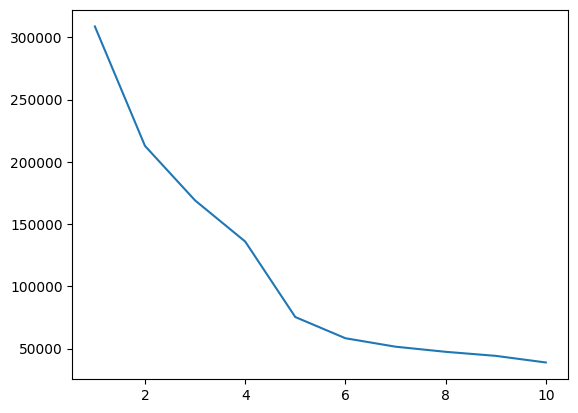

In [127]:
import matplotlib.pyplot as plt

plt.plot(range(1,11), wcss)

In [128]:
km = KMeans(n_clusters=6)
y_pred = km.fit_predict(data)
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [129]:
df = pd.DataFrame()

df["col1"] = data.iloc[:, 0]
df["col2"] = data.iloc[:, 1]
df["col3"] = data.iloc[:, 2]
df["label"] = y_pred


In [130]:
fig = px.scatter_3d(df, x = "col1", y = "col2", z = "col3", color ="label")
fig.show()

In [132]:
# Add auto-rotate animation
fig.update_layout(
    scene_camera=dict(eye=dict(x=1.5, y=1.5, z=1)),  # initial camera angle
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, {"frame": {"duration": 50, "redraw": True},
                         "fromcurrent": True, "transition": {"duration": 0}}],
        )]
    )]
)

frames = []
for angle in range(0, 360, 5):
    camera = dict(eye=dict(
        x=1.5 * np.cos(np.radians(angle)),
        y=1.5 * np.sin(np.radians(angle)),
        z=1
    ))
    frames.append(dict(layout=dict(scene_camera=camera)))

fig.frames = frames

# Save as HTML for web viewing
fig.write_html("clusters_3d_auto_rotate.html")
fig.show()
